# MNIST ~

In [12]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

for im, label in train_data:
    print(im.shape)
    break

Using cpu device
torch.Size([64, 1, 28, 28])


In [19]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0) #output_shape=(16,24,24)
        self.relu1 = nn.ReLU() # activation
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,12,12)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #output_shape=(32,8,8)
        self.relu2 = nn.ReLU() # activation
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,4,4)
        # Fully connected 1 ,#input_shape=(32*4*4)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        # Convolution 1
        x = self.cnn1(x)
        x = self.relu1(x)
        # Max pool 1
        x = self.maxpool1(x)
        # Convolution 2 
        x = self.cnn2(x)
        x = self.relu2(x)
        # Max pool 2 
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        # Linear function (readout)
        x = self.fc1(x)
        return x

# build model
model = CNN().to(device)

# define cost
criterion = nn.CrossEntropyLoss()

# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))

losses = []
acces = []
eval_losses = []
eval_acces = []



for epoch in range(5):
    train_loss = 0
    train_acc = 0
    model.train()      
    
    for im, label in train_data:
        
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        
        loss = criterion(pred, label)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        


        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item() #  sum() ===>命中的次數 產生如: tensor:24   item() ===>取值 
        acc = num_correct / im.shape[0]            #  命中數 / 64
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    

    eval_loss = 0
    eval_acc = 0
    model.eval()
    
    for im, label in test_data:

        im = im.to(device)
        label = label.to(device)
        
        pred = model(im)
        loss = criterion(pred, label)

        
        eval_loss += loss.item()

        
        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
    
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_data), train_acc / len(train_data), eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 0.176243, Train Acc: 0.945912, Eval Loss: 0.055590, Eval Acc: 0.981309
epoch: 1, Train Loss: 0.055835, Train Acc: 0.982643, Eval Loss: 0.042406, Eval Acc: 0.985562
epoch: 2, Train Loss: 0.041552, Train Acc: 0.987040, Eval Loss: 0.038247, Eval Acc: 0.986254
epoch: 3, Train Loss: 0.033565, Train Acc: 0.989955, Eval Loss: 0.028260, Eval Acc: 0.990111
epoch: 4, Train Loss: 0.028176, Train Acc: 0.991421, Eval Loss: 0.039092, Eval Acc: 0.988924


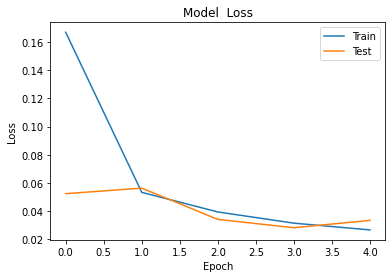

In [3]:
plt.plot(np.arange(0,5),losses)
plt.plot(np.arange(0,5),eval_losses)
plt.title('Model  Loss')
plt.xlabel('Epoch')        
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

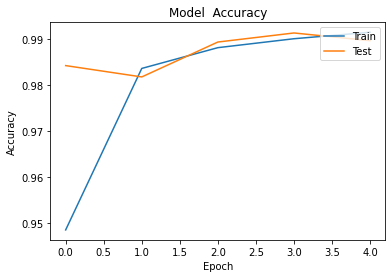

In [4]:
plt.plot(np.arange(0,5),acces)
plt.plot(np.arange(0,5),eval_acces)
plt.title('Model  Accuracy')
plt.xlabel('Epoch')        
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

# Cifar10

In [34]:
import torch
import torchvision
import torchvision.transforms as transforms

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

transform = transforms.Compose( 
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 
trainset = torchvision.datasets.CIFAR10(root='./dataset/cifar10_data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./dataset/cifar10_data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using cpu device
Files already downloaded and verified
Files already downloaded and verified


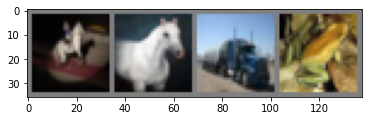

horse horse truck  frog


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img): 
    img = img / 2 + 0.5     # unnormalize (原本是-0.5 再 /0.5 恢復變 *0.5+0.5)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 原本pytorch 是深、長、寬 ； ply.show要改長、寬、深
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input3 output6(6個kernel) kernelsize=5*5/
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # momentum 動量

In [37]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data
        
        inputs -inputs.to(device)
        labels -labels.to(device)
 
        # zero the parameter gradients
        optimizer.zero_grad() 

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.844
[1,  6000] loss: 1.648
[1,  8000] loss: 1.551
[1, 10000] loss: 1.485
[1, 12000] loss: 1.457
[2,  2000] loss: 1.392
[2,  4000] loss: 1.345
[2,  6000] loss: 1.327
[2,  8000] loss: 1.324
[2, 10000] loss: 1.303
[2, 12000] loss: 1.280
Finished Training


In [39]:
PATH = './save/cifar_net.pth'
torch.save(net.state_dict(), PATH)

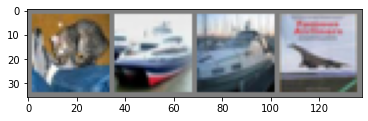

GroundTruth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [40]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog   dog truck  frog


In [13]:
correct = 0
total = 0
with torch.no_grad(): #不允許調參數 及 微分。
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


# Cat and Dog Classification

In [2]:
import os
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torchvision import transforms

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))


class CustomImageDataset(Dataset):

    
    def read_data_set(self):

        all_img_files = []
        all_labels = []
        class_names = []
        
        for index, i in enumerate(os.listdir(self.data_set_path)):
            class_names.append(i)
            for j in os.listdir(self.data_set_path+'/'+i):
                all_img_files.append(self.data_set_path+'/'+i+'/'+j)
                all_labels.append(index)
        #print(all_img_files)
        #print(all_labels)
        return all_img_files, all_labels, len(all_img_files), len(class_names)
    
    
    def __init__(self, data_set_path, transforms=None):
        self.data_set_path = data_set_path
        #self.read_data_set2()
        self.image_files_path, self.labels, self.length, self.num_classes = self.read_data_set()
        self.transforms = transforms

    def __getitem__(self, index):
        image = Image.open(self.image_files_path[index])
        image = image.convert("RGB")

        if self.transforms is not None:
            image = self.transforms(image)

        label = self.labels[index]
        return image, label

    def __len__(self):
        return self.length


class CustomConvNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomConvNet, self).__init__()

        self.layer1 = self.conv_module(3, 16)
        self.layer2 = self.conv_module(16, 32)
        self.layer3 = self.conv_module(32, 64)
        self.layer4 = self.conv_module(64, 128)
        self.layer5 = self.conv_module(128, 256)
        self.gap = self.global_avg_pool(256, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.gap(out)
        out = out.view(-1, num_classes)

        return out

    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)))


hyper_param_epoch = 3
hyper_param_batch = 32
hyper_param_learning_rate = 0.001

transforms_train = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.RandomRotation(10.),
                                       transforms.ToTensor()])

transforms_test = transforms.Compose([transforms.Resize((128, 128)),
                                      transforms.ToTensor()])

train_data_set = CustomImageDataset(data_set_path="./data/train", transforms=transforms_train)
train_loader = DataLoader(train_data_set, batch_size=hyper_param_batch, shuffle=True)

test_data_set = CustomImageDataset(data_set_path="./data/test", transforms=transforms_test)
test_loader = DataLoader(test_data_set, batch_size=hyper_param_batch, shuffle=True)


num_classes = train_data_set.num_classes
custom_model = CustomConvNet(num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=hyper_param_learning_rate)

for e in range(hyper_param_epoch):
    for i_batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = custom_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i_batch + 1) % hyper_param_batch == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(e + 1, hyper_param_epoch, loss.item()))

# Test the model
custom_model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels  in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = custom_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += len(labels)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the {} test images: {} %'.format(total, 100 * correct / total))
    


Using cpu device
Epoch [1/3], Loss: 0.6690
Epoch [1/3], Loss: 0.6027
Epoch [1/3], Loss: 0.5496
Epoch [1/3], Loss: 0.5896
Epoch [1/3], Loss: 0.5611
Epoch [1/3], Loss: 0.5983
Epoch [1/3], Loss: 0.6655
Epoch [2/3], Loss: 0.6506
Epoch [2/3], Loss: 0.4936
Epoch [2/3], Loss: 0.4708
Epoch [2/3], Loss: 0.4771
Epoch [2/3], Loss: 0.4426
Epoch [2/3], Loss: 0.4686
Epoch [2/3], Loss: 0.4323
Epoch [3/3], Loss: 0.4408
Epoch [3/3], Loss: 0.5452
Epoch [3/3], Loss: 0.4602
Epoch [3/3], Loss: 0.4369
Epoch [3/3], Loss: 0.6052
Epoch [3/3], Loss: 0.4886
Epoch [3/3], Loss: 0.4329
Test Accuracy of the model on the 2023 test images: 77.40978744438952 %


# Cat and Dog Classification(ImageFolder)
建一個資料夾 裡面一個trian 一個test 用內建api load資料


In [1]:
import os
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

transforms_train = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.RandomRotation(10.),
                                       transforms.ToTensor()])

train_data_set = ImageFolder('./data/train', transform=transforms_train)

print(train_data_set.class_to_idx)
print(train_data_set.imgs[:5])
print(train_data_set[0][1])
print(train_data_set[0][0].shape)


{'cats': 0, 'dogs': 1}
[('./data/train\\cats\\cat.1.jpg', 0), ('./data/train\\cats\\cat.10.jpg', 0), ('./data/train\\cats\\cat.100.jpg', 0), ('./data/train\\cats\\cat.1000.jpg', 0), ('./data/train\\cats\\cat.1001.jpg', 0)]
0
torch.Size([3, 128, 128])


In [16]:
import os
from PIL import Image

import torch
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))


class CustomConvNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomConvNet, self).__init__()

        self.layer1 = self.conv_module(3, 16)
        self.layer2 = self.conv_module(16, 32)
        self.layer3 = self.conv_module(32, 64)
        self.layer4 = self.conv_module(64, 128)
        self.layer5 = self.conv_module(128, 256)
        self.gap = self.global_avg_pool(256, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.gap(out)
        out = out.view(-1, num_classes)

        return out

    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)))


hyper_param_epoch = 3
hyper_param_batch = 32
hyper_param_learning_rate = 0.001

transforms_train = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.RandomRotation(10.),
                                       transforms.ToTensor()])

transforms_test = transforms.Compose([transforms.Resize((128, 128)),
                                      transforms.ToTensor()])

train_data_set = ImageFolder('./data/train', transform=transforms_train)
train_loader = DataLoader(train_data_set, batch_size=hyper_param_batch, shuffle=True)


test_data_set = ImageFolder('./data/test', transform=transforms_test)
test_loader = DataLoader(test_data_set, batch_size=hyper_param_batch, shuffle=True)


num_classes = len(train_data_set.class_to_idx)
custom_model = CustomConvNet(num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=hyper_param_learning_rate)

for e in range(hyper_param_epoch):
    for i_batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = custom_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i_batch + 1) % hyper_param_batch == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(e + 1, hyper_param_epoch, loss.item()))

# Test the model
custom_model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels  in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = custom_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += len(labels)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the {} test images: {} %'.format(total, 100 * correct / total))
    


Using cpu device
Epoch [1/3], Loss: 0.6193
Epoch [1/3], Loss: 0.7256
Epoch [1/3], Loss: 0.5685
Epoch [1/3], Loss: 0.5066
Epoch [1/3], Loss: 0.5693
Epoch [1/3], Loss: 0.7040
Epoch [1/3], Loss: 0.5100
Epoch [2/3], Loss: 0.5772
Epoch [2/3], Loss: 0.5393
Epoch [2/3], Loss: 0.5894
Epoch [2/3], Loss: 0.4766
Epoch [2/3], Loss: 0.5051
Epoch [2/3], Loss: 0.5638
Epoch [2/3], Loss: 0.5188
Epoch [3/3], Loss: 0.4729
Epoch [3/3], Loss: 0.4602
Epoch [3/3], Loss: 0.4799
Epoch [3/3], Loss: 0.6825
Epoch [3/3], Loss: 0.5179
Epoch [3/3], Loss: 0.5571
Epoch [3/3], Loss: 0.4892
Test Accuracy of the model on the 2023 test images: 80.67226890756302 %
